In [2]:
!pip install nxviz

     |████████████████████████████████| 10.3 MB 7.1 MB/s 
     |████████████████████████████████| 10.8 MB 44.9 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.0 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [1]:
pip install matplotlib==3.1.3

     |████████████████████████████████| 13.1 MB 90 kB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.4.2
    Uninstalling matplotlib-3.4.2:
      Successfully uninstalled matplotlib-3.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nxviz 0.6.3 requires matplotlib>=3.3.3, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [1]:
import networkx as nx
import csv
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
nx.__version__

'2.5.1'

      EMPRESA (SIGLA)           EMPRESA (NOME)  ... HORAS VOADAS  BAGAGEM (KG)
0                 AAL  AMERICAN AIRLINES, INC.  ...      309,584           0.0
1                 AAL  AMERICAN AIRLINES, INC.  ...          5,5           0.0
2                 AAL  AMERICAN AIRLINES, INC.  ...      104,201           0.0
3                 AAL  AMERICAN AIRLINES, INC.  ...      251,914           0.0
4                 AAL  AMERICAN AIRLINES, INC.  ...      254,701           0.0
...               ...                      ...  ...          ...           ...
10816             VDA     VOLGA DNEPR AIRLINES  ...          NaN           0.0
10817             VDA     VOLGA DNEPR AIRLINES  ...          NaN           0.0
10818             VDA     VOLGA DNEPR AIRLINES  ...        5,133           0.0
10819             VDA     VOLGA DNEPR AIRLINES  ...          NaN           0.0
10820             VDA     VOLGA DNEPR AIRLINES  ...          NaN           0.0

[10821 rows x 38 columns]


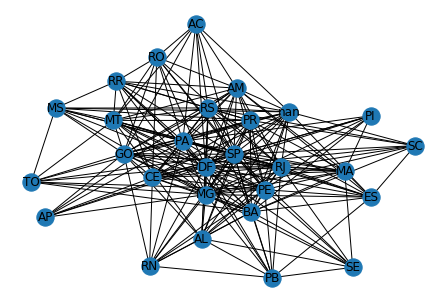

In [45]:
G = nx.Graph()
df = pd.read_csv("resumo_anual_2021.csv", encoding = "utf-8", sep = ";")
print(df)
G=nx.from_pandas_edgelist(df,'AEROPORTO DE ORIGEM (UF)', 'AEROPORTO DE DESTINO (UF)')
nx.draw(G, with_labels=True)

# Qual o aeroporto com mais ligações com outros aeroportos?

SP 29


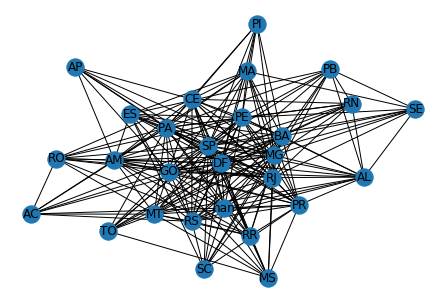

[(nan, {'vizinhos': 20}), ('SP', {'vizinhos': 29}), ('AM', {'vizinhos': 20}), ('RJ', {'vizinhos': 24}), ('RR', {'vizinhos': 15}), ('PA', {'vizinhos': 24}), ('BA', {'vizinhos': 23}), ('CE', {'vizinhos': 20}), ('GO', {'vizinhos': 23}), ('SC', {'vizinhos': 11}), ('DF', {'vizinhos': 29}), ('RS', {'vizinhos': 21}), ('PE', {'vizinhos': 24}), ('PR', {'vizinhos': 20}), ('MG', {'vizinhos': 27}), ('SE', {'vizinhos': 11}), ('MA', {'vizinhos': 16}), ('MT', {'vizinhos': 19}), ('AP', {'vizinhos': 9}), ('TO', {'vizinhos': 11}), ('RO', {'vizinhos': 13}), ('PB', {'vizinhos': 13}), ('AL', {'vizinhos': 16}), ('RN', {'vizinhos': 13}), ('ES', {'vizinhos': 15}), ('MS', {'vizinhos': 13}), ('AC', {'vizinhos': 11}), ('PI', {'vizinhos': 10})]


In [49]:
max =0
name = ''
color_map =[]
for node in G.nodes:
  if G.degree(node)>max:
    max = G.degree(node)
    name = node
print(name,max)
nx.draw(G, with_labels=True,node_size=300)
plt.show()
for node in G.nodes:
  G.nodes[node]["vizinhos"] = G.degree(node)
print(list(G.nodes(data=True)))

# Pela lista imprimida na tela. Não há um só estado sem voos

In [14]:
nx.is_connected(G) 

True

In [50]:
G.nodes(data=True)


NodeDataView({nan: {'vizinhos': 20}, 'SP': {'vizinhos': 29}, 'AM': {'vizinhos': 20}, 'RJ': {'vizinhos': 24}, 'RR': {'vizinhos': 15}, 'PA': {'vizinhos': 24}, 'BA': {'vizinhos': 23}, 'CE': {'vizinhos': 20}, 'GO': {'vizinhos': 23}, 'SC': {'vizinhos': 11}, 'DF': {'vizinhos': 29}, 'RS': {'vizinhos': 21}, 'PE': {'vizinhos': 24}, 'PR': {'vizinhos': 20}, 'MG': {'vizinhos': 27}, 'SE': {'vizinhos': 11}, 'MA': {'vizinhos': 16}, 'MT': {'vizinhos': 19}, 'AP': {'vizinhos': 9}, 'TO': {'vizinhos': 11}, 'RO': {'vizinhos': 13}, 'PB': {'vizinhos': 13}, 'AL': {'vizinhos': 16}, 'RN': {'vizinhos': 13}, 'ES': {'vizinhos': 15}, 'MS': {'vizinhos': 13}, 'AC': {'vizinhos': 11}, 'PI': {'vizinhos': 10}})